In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from instrNoise import *
sns.set(rc={'figure.figsize':(17,12)})

In [23]:
fmin = 1e-4
fmax = 2e-2 
dur = 1e6
df = 1/dur  # frequency interval 

wmin = 0
wmax = 1
nmin = 0
nmax = 1

H0 = 2.2e-18
h = 0.72

In [24]:
def omega_sens(freqs):
    cov_N = aet_noise_spectrum(freqs)
    S1, S2, S3 = cov_N[0,0,:], cov_N[1,1,:], cov_N[2,2,:]
    h_sens = S1**2  # choosing S1 
    return 4/3 * (np.pi/H0)**2 * freqs**3 * h_sens

def primo_gw(f, nhat, what):
    rts = 0.06  # tensor-to-scalar ratio
    g_bbn = 10.75
    gs_bbn = 10.75
    g_eq = 3.3626
    gs_eq = 3.9091
    del_R = 2.25e-9
    z_bbn = 5.9e9 - 1
    kcmb = 0.05
    gamma = ((2.3*10**4))**-1 * (g_bbn/g_eq) * (gs_eq/gs_bbn)**1.3333

    A1 = (del_R**2)*gamma/24
    A2 = (2*np.pi*f/H0) * (1 / (gamma**0.5 * (1 + z_bbn)))
    A3 = (2*np.pi*f/H0) * (0.72/150.)
    alpha_hat = 2 * (3 * what - 1) / (3 * what + 1)
    
#     import pdb; pdb.set_trace()
    return rts * (A1 * A2**alpha_hat * A3**nhat)

def generate_freqs(fmin, fmax, df):
    return np.arange(fmin, fmax+df, df)

def logL(freqs, dur, sens, nhat, what):
    '''
    log likelihood for each point in the what vs nhat
    '''
    gw = np.array([])
    
    for f in freqs:
        gw = np.append(gw, primo_gw(f,nhat,what))
    
    sum_term = 0.5*(h*gw/(h*sens))**2
    
#     print(sum_term, -dur*np.sum(sum_term))
#     print(np.max(gw))
    
    log_L = -dur * np.sum(sum_term)

    return log_L

def logsumexp(x):
    c = x.max()
    return c + np.log(np.sum(np.exp(x - c)))

In [25]:
%%time
whats = np.arange(wmin, wmax, .05)
nhats = np.arange(nmin, nmax, .05)
freqs = generate_freqs(fmin, fmax, df)
sens = omega_sens(freqs)

# ll = logL(freqs, dur, sens, 0, .34)

# plt.plot(sens**2)
data = pd.DataFrame(columns=['n','w','ll'])
for w in whats:
    for n in nhats:
        res = logL(freqs, dur, sens, n, w)
        data = data.append({'n':n, 'w':w, 'll':res}, ignore_index=True)

CPU times: user 2min 21s, sys: 58.1 ms, total: 2min 21s
Wall time: 2min 21s


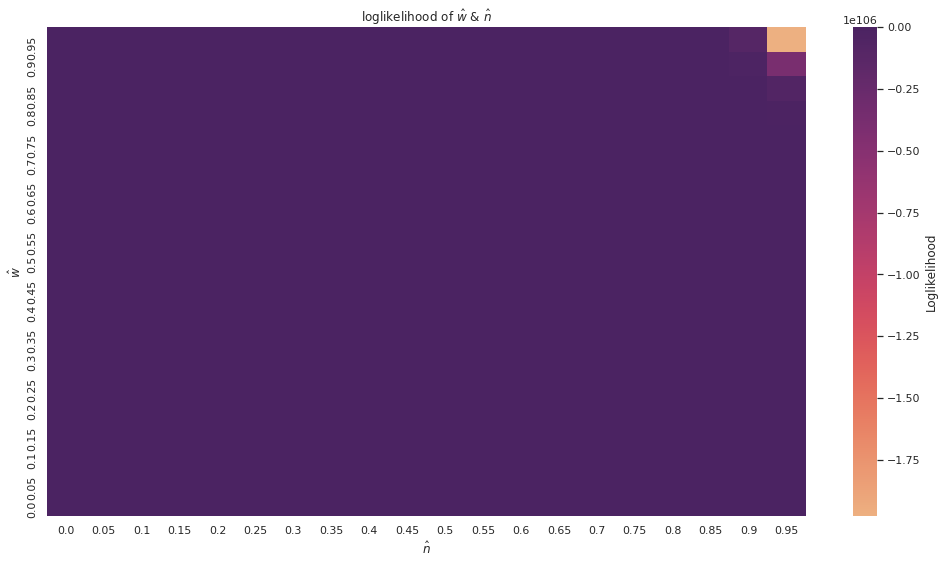

In [21]:
table = data.pivot('w', 'n', 'll')
ax = plt.axes()
sns.heatmap(table,
            xticklabels=table.columns.values.round(2),
            yticklabels=table.index.values.round(2),
            ax=ax,
            cbar_kws={'label': 'Loglikelihood'},
            cmap='flare')

ax.set_title(r'loglikelihood of $\hat{w} \ & \ \hat{n}$')
ax.set_xlabel(r'$\hat{n}$')
ax.set_ylabel(r'$\hat{w}$')
ax.invert_yaxis()
plt.show()

In [11]:
table

n,0.00,0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95
w,,,,,,,,,,,,,,,,,,,,
0.00,-2.184680e+32,-4.460944e+33,-9.135074e+34,-1.875989e+36,-3.863379e+37,-7.978250e+38,-1.652095e+40,-3.430301e+41,-7.141364e+42,-1.490607e+44,-3.119313e+45,-6.544075e+46,-1.376293e+48,-2.901521e+49,-6.131571e+50,-1.298756e+52,-2.757223e+53,-5.866552e+54,-1.250948e+56,-2.673125e+57
0.05,-4.078297e+40,-8.565197e+41,-1.803267e+43,-3.805624e+44,-8.050329e+45,-1.706876e+47,-3.627180e+48,-7.724915e+49,-1.648748e+51,-3.526382e+52,-7.557842e+53,-1.623075e+55,-3.492457e+56,-7.529306e+57,-1.626261e+59,-3.518985e+60,-7.628116e+61,-1.656423e+63,-3.602976e+64,-7.850001e+65
0.10,-1.132830e+47,-2.423060e+48,-5.193452e+49,-1.115373e+51,-2.400131e+52,-5.174648e+53,-1.117732e+55,-2.418720e+56,-5.243315e+57,-1.138623e+59,-2.476791e+60,-5.396556e+61,-1.177727e+63,-2.574286e+64,-5.635560e+65,-1.235577e+67,-2.712938e+68,-5.965311e+69,-1.313516e+71,-2.896229e+72
0.15,-1.611064e+52,-3.488557e+53,-7.567355e+54,-1.644332e+56,-3.579016e+57,-7.802781e+58,-1.703844e+60,-3.726390e+61,-8.162235e+62,-1.790510e+64,-3.933478e+65,-8.653552e+66,-1.906409e+68,-4.205605e+69,-9.290068e+70,-2.054826e+72,-4.550771e+73,-1.009108e+75,-2.240380e+76,-4.979975e+77
0.20,-2.615477e+56,-5.712805e+57,-1.249750e+59,-2.738147e+60,-6.008063e+61,-1.320206e+63,-2.905124e+64,-6.401609e+65,-1.412544e+67,-3.120979e+68,-6.904676e+69,-1.529493e+71,-3.392287e+72,-7.532990e+73,-1.674795e+75,-3.727912e+76,-8.307487e+77,-1.853381e+79,-4.139443e+80,-9.255357e+81
0.25,-8.324109e+59,-1.829879e+61,-4.028269e+62,-8.879989e+63,-1.960158e+65,-4.332537e+66,-9.588563e+67,-2.124777e+69,-4.714231e+70,-1.047213e+72,-2.329035e+73,-5.185896e+74,-1.156030e+76,-2.579899e+77,-5.763897e+78,-1.289144e+80,-2.886359e+81,-6.469276e+82,-1.451477e+84,-3.259919e+85
0.30,-7.568661e+62,-1.672044e+64,-3.698635e+65,-8.191968e+66,-1.816673e+68,-4.033633e+69,-8.966779e+70,-1.995663e+72,-4.446712e+73,-9.919339e+74,-2.215183e+76,-4.952351e+77,-1.108358e+79,-2.483177e+80,-5.569130e+81,-1.250293e+83,-2.809796e+84,-6.320764e+85,-1.423280e+87,-3.207977e+88
0.35,-2.574525e+65,-5.709908e+66,-1.267918e+68,-2.818856e+69,-6.274289e+70,-1.398159e+72,-3.119174e+73,-6.966348e+74,-1.557561e+76,-3.486189e+77,-7.811160e+78,-1.751989e+80,-3.933613e+81,-8.840762e+82,-1.988929e+84,-4.478928e+85,-1.009599e+87,-2.277916e+88,-5.144411e+89,-1.162888e+91
0.40,-3.992935e+67,-8.884071e+68,-1.978952e+70,-4.413191e+71,-9.852708e+72,-2.202092e+74,-4.927018e+75,-1.103555e+77,-2.474330e+78,-5.553513e+79,-1.247723e+81,-2.806092e+82,-6.317032e+83,-1.423462e+85,-3.210665e+86,-7.248610e+87,-1.638024e+89,-3.704990e+90,-8.387842e+91,-1.900666e+93


-2.184679515640389e+32


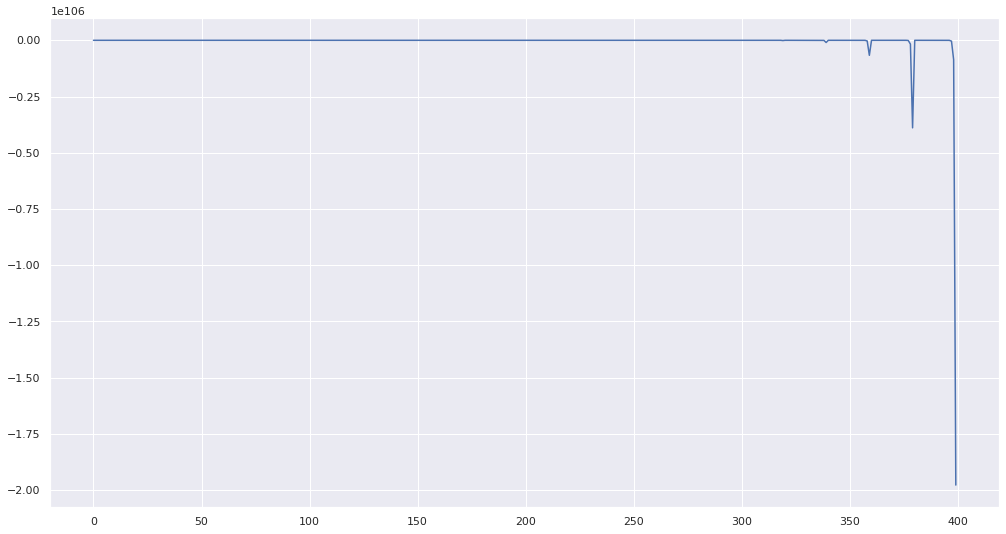

In [20]:
llmax = np.max(data.ll)
print(llmax)
plt.plot(data.ll-llmax)

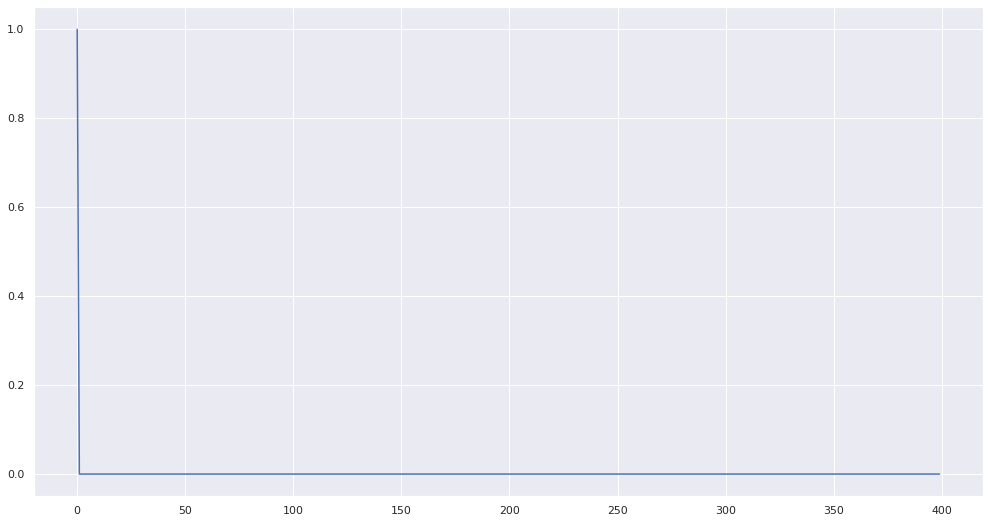

In [17]:
rel_L = np.exp(data.ll-llmax)
plt.plot(rel_L)